In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [111]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from numpy import linalg as LA

## Machine Learning: Programming Exercise 7
## K-Means Clustering and Principal Component Analysis
## 1. K-Means Clustering

In this this exercise, you will implement the K-means algorithm and use it for image compression. You will first start on an example 2D dataset that will help you gain an intuition of how the K-means algorithm works. After that, you wil use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.  
### 1.1 Implementing K-means
The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set $\{x^{(1)},\ldots x^{(m)}\}$ (where $x^{(i)}\in \mathbb{R}^n$), and want to group the data into a few cohesive 'clusters'. The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

The inner-loop of the algorithm repeatedly carries out two steps: 
- Assigning each training example  to its closest centroid
- Recomputing the mean of each centroid using the points assigned to it.

The K-means algorithm will always converge to some final set of means for the centroids. Note that the converged solution may not always be ideal and depends on the initial setting of the centroids. Therefore, in practice the K-means algorithm is usually run a few times with dierent random initializations. One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion). You will implement the two phases of the K-means algorithm separately in the next sections.

#### 1.1.1 Finding closest centroids
In the 'cluster assignment' phase of the K-means algorithm, the algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current positions of centroids. Specically, for every example $i$ we set 
<center>$c^{(i)} :=j \quad\text{that minimizes}\quad\left||x^{(i)}-\mu_j\right||^2,$</center>
where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$, and $\mu_j$ is the position (value) of the $j$-th centroid. Note that $c^{(i)}$ corresponds to idx(i) in the starter code.  

Your task is to complete the function findClosestCentroids. This function takes the data matrix X and the locations of all centroids inside centroids and should output a one-dimensional array idx that holds the index (a value in $\{1,\ldots,K\}$, where $K$ is total number of centroids) of the closest centroid to every training example. You can implement this using a loop over every training example and every centroid.  
Once you have completed, the code below will run your code and you should see the output [1 3 2] corresponding to the centroid assignments for the first 3 examples.(**Note: Python index starts from 0, the output should be [0, 2, 1]**)

In [18]:
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    m = X.shape[0]
    idx = np.zeros(m,)
    for i in range(m):
        distances = np.zeros(K,)
        for j in range(K):
            distances[j] = np.sqrt(np.sum((X[i,:]-centroids[j,:])**2))
        nearest = distances.argmin()
        idx[i] = nearest
    return idx

In [19]:
mat = scipy.io.loadmat('ex7data2.mat')
X = mat['X']

# Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

#  Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(X, initial_centroids)
print('Closest centroids for the first 3 examples: ', idx[:3])

Closest centroids for the first 3 examples:  [0. 2. 1.]


### 1.1.2 Computing centroid means
Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specically, for every centroid $k$ we set

<center>$\mu_k := \frac{1}{|C_k|}\sum_{i\in C_k}{x^{(i)}}$</center>

where $C_k$ is the set of examples that are assigned to centroid $k$.

You should now complete computeCentroids. You can implement this function using a loop over the centroids.  
You can also use a loop over the examples; but if you can use a vectorized implementation that does not use such a loop, your code may run faster. 

Once you have completed, the code below will run your code and output the centroids after the first step of K-means. The centroids should be:
- [ 2.428301 3.157924 ]
- [ 5.813503 2.633656 ]
- [ 7.119387 3.616684 ]

In [37]:
def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        centroids[i,:] = np.mean(X[np.where(idx==i),:], axis=1)
    return centroids

In [38]:
centroids = computeCentroids(X, idx, K);
print('Centroids computed after initial finding of closest centroids: \n', centroids)

Centroids computed after initial finding of closest centroids: 
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


### 1.2 K-means on example dataset
After you have completed the two functions (findClosestCentroids and computeCentroids), the code below will run the K-means algorithm on a toy 2D dataset to help you understand how K-means works. Your functions are called by the function runKmeans.

In [39]:
def runkMeans(X, initial_centroids, max_iters):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    
    idx = np.zeros(m,)
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        previous_centroids = centroids
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

In [40]:
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
centroids, idx = runkMeans(X, initial_centroids, max_iters)

<Figure size 432x360 with 0 Axes>

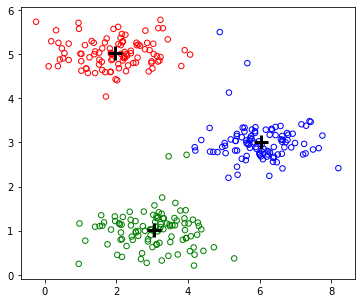

In [64]:
cluster_0 = X[np.where(idx==0),:][0]
cluster_1 = X[np.where(idx==1),:][0]
cluster_2 = X[np.where(idx==2),:][0]

plt.figure(figsize=(6,5))
plt.scatter(x = cluster_0[:,0], y =cluster_0[:,1], marker='o', c='none', edgecolors='red',s=30)
plt.scatter(x = cluster_1[:,0], y =cluster_1[:,1], marker='o', c='none', edgecolors='green',s=30)
plt.scatter(x = cluster_2[:,0], y =cluster_2[:,1], marker='o', c='none', edgecolors='blue',s=30)
plt.scatter(x = centroids[:,0], y =centroids[:,1], marker='+', c='black', s=200, linewidth=3)

###  1.4 Image compression with K-means
In this exercise, you will apply K-means to image compression. In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding. Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors. By making this reduction, it is possible to represent (compress) the photo in an efficient way. Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities). 

 In this exercise, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image. Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3-dimensional RGB space. Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.
 
#### 1.4.1 K-means on pixels
Read the data into a three-dimensional matrix A whose first two indices identify a pixel position and whose last index represents red, green, or blue. For example, A(50,33,3) gives the blue intensity of the pixel at row 51 and column 34. The code below first loads the image, and then reshapes it to create an m by 3 matrix of pixel colors (where $m = 16384 = 128\times128$), and calls your K-means function on it.

Reshape the image into an Nx3 matrix where N = number of pixels. Each row will contain the Red, Green and Blue pixel values. This gives us our dataset matrix X that we will use K-Means on.

In [68]:
#  Load an image of a bird
A = plt.imread('bird_small.png')
A = A / 255 # Divide by 255 so that all values are in the range 0 - 1

#  Size of the image
img_size = A.shape

#  Reshape the image into an Nx3 matrix
X = A.reshape(img_size[0]*img_size[1], 3)

Run your K-Means algorithm on this data. You should try different values of K and max_iters here:

In [69]:
K = 16
max_iters = 10

When using K-Means, it is important the initialize the centroids randomly. You should complete the function kMeansInitCentroids before proceeding

In [74]:
def kMeansInitCentroids(X, K):
    m = X.shape[0]
    randidx = np.random.choice(m, K, replace=False)
    centroids = X[randidx, :]
    return centroids

In [77]:
initial_centroids = kMeansInitCentroids(X, K);
#  Run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters)

In [84]:
X_recovered = centroids[idx.astype(int),:]
#  Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(img_size[0], img_size[1], 3)

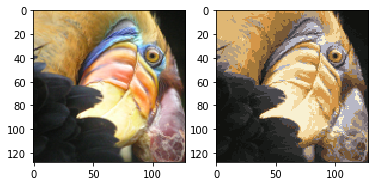

In [96]:
ax1 = plt.subplot(121)
ax1.imshow(A*255)
ax1 = plt.subplot(122)
ax1.imshow(X_recovered*255)

## 2. Principal Component Analysis
In this exercise, you will use principal component analysis (PCA) to perform dimensionalty reduction. You will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset. The code provided, will help you step through the first half of the exercise.
### 2.1 Example dataset
In this part of the exercise, you will visualize what happens when you use PCA to reduce the data from 2D to 1D. 

In [175]:
mat = scipy.io.loadmat('ex7data1.mat')
X = mat['X']

<Figure size 432x360 with 0 Axes>

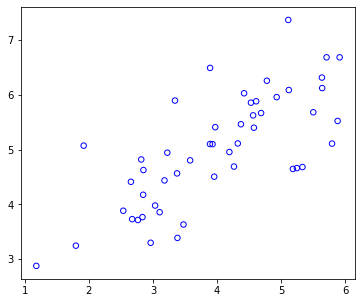

In [176]:
plt.figure(figsize=(6,5))
plt.scatter(x = X[:,0], y =X[:,1], marker='o', c='none', edgecolors='blue',s=30)

### 2.2 Implementing PCA
In this part of the exercise, you will implement PCA. PCA consists of two computational steps: First, you compute the covariance matrix of the data. Then, you use numpy.linalg.svd to compute the eigenvectors $U_1, U_2,\ldots,U_n$. These will correspond to the principal components of variation in the data. Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range. In the code below, this normalization has been performed for you using the featureNormalize function.  
    After normalizing the data, you can run PCA to compute the principal components. You task is to complete the function pca to compute the principal components of the dataset. First, you should compute the covariance matrix of the data, which is given by:
<center>$\sum = \frac{1}{m}X^{T}X$</center>
where $X$ is the data matrix with examples in rows, and $\sum$ is the number of examples. Note that  is a  matrix and not the summation operator.

In [177]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm = X_norm/sigma
    
    return X_norm, mu, sigma

In [178]:
def pca(X):
    m, n = X.shape
    cov = 1/m * X.T.dot(X)
    U, S, V = LA.svd(cov)
    return U, S

In [179]:
#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)

In [180]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

<Figure size 432x360 with 0 Axes>

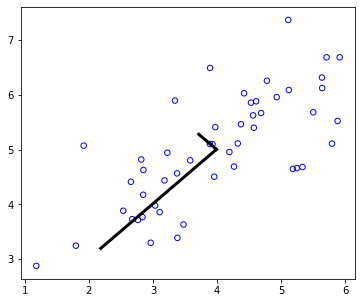

In [181]:
plt.figure(figsize=(6,5))
plt.scatter(x = X[:,0], y =X[:,1], marker='o', c='none', edgecolors='blue',s=30)
plt.plot((mu[0], (mu+1.5*S[0]*U[:,0])[0]), (mu[1], (mu+1.5*S[0]*U[:,0])[1]), color='black', linewidth=3)
plt.plot((mu[0], (mu+1.5*S[1]*U[:,1])[0]), (mu[1], (mu+1.5*S[1]*U[:,1])[1]), color='black', linewidth=3)

In [182]:
print('Top eigenvector U(:,1) = %.6f %.6f'%(U[0,0], U[1,0]))

Top eigenvector U(:,1) = -0.707107 -0.707107


### 2.3 Dimensionality reduction with PCA
#### 2.3.1 Projecting the data onto the principal components
You should now complete the function projectData. Specically, you are given a dataset X, the principal components U, and the desired number of dimensions to reduce to K. You should project each example in X onto the top K components in U. Note that the top K components in U are given by the first K columns of U, that is U_reduce = U(:, 1:K).
Once you have completed the code in projectData.m, run the code below to project the first example onto the first dimension and you should see a value of about 1.481 (or possibly -1.481, if you got $-U_1$ instead of $U_1$)

In [183]:
def projectData(X, U, K):
    m, n = X.shape
    Z = np.zeros((m, K))
    for i in range(m):
        for j in range(K):
            x = X[i, :].reshape(n, 1)
            projection_k = x.T.dot(U[:,j].reshape(n, 1)) 
            Z[i, j] = projection_k
    return Z

In [184]:
#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: ', Z[0])

Projection of the first example:  [1.48127391]


#### 2.3.2 Reconstructing an approximation of the data
Your task is to complete recoverData to project each example in Z back onto the original space and return the recovered approximation in X_rec. Once you have completed the code in recoverData.m, the code below will recover an approximation of the first example and you should see a value of about [-1.047 -1.047].

In [188]:
def recoverData(Z, U, K):
    m, k = Z.shape
    n = U.shape[0]
    X_rec = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            v = Z[i, :].reshape(k,1)
            recovered_j = v.T.dot(U[j,:K].reshape(k,1).T)
            X_rec[i, j] = recovered_j
    return X_rec

In [189]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: ', X_rec[0])

Approximation of the first example:  [-1.04741883 -1.04741883]


### 2.3.3 Visualizing the projections

<Figure size 432x360 with 0 Axes>

(-4, 3)

(-4, 3)

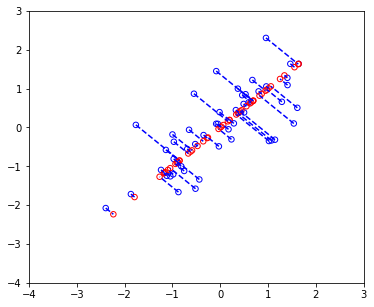

In [199]:
plt.figure(figsize=(6,5))
plt.scatter(x = X_norm[:,0], y =X_norm[:,1], marker='o', c='none', edgecolors='blue',s=30)
plt.scatter(x = X_rec[:,0], y =X_rec[:,1], marker='o', c='none', edgecolors='red',s=30)
plt.ylim([-4,3])
plt.xlim([-4,3])
for i in range(X_rec.shape[0]):
    plt.plot([X_norm[i,0],X_rec[i,0]],[X_norm[i,1],X_rec[i,1]],'b',linestyle='--')

### 2.4 Face image dataset
In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset ex7faces.mat contains a dataset* X of face images, each  in grayscale. 

In [209]:
mat = scipy.io.loadmat('ex7faces.mat')
X = mat['X']

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

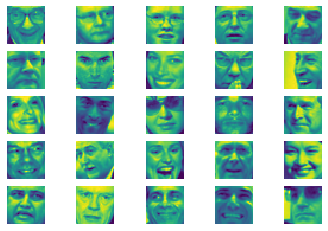

In [205]:
# visualize the first 25 faces
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.imshow(X[i,:].reshape((32,32)).T)

#### 2.4.1 PCA on faces

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

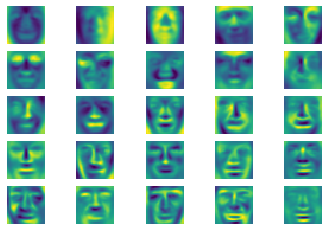

In [216]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.imshow(U[:, :36].T[i,:].reshape((32,32)).T)

In [217]:
K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a size of: ', Z.shape)

The projected data Z has a size of:  (5000, 100)
